# ОКОННЫЕ ФУНКЦИИ

Возможно вы о них забыли, но они вернулись! Данные по продажам авокадо 🥑:   
    
- date — дата  
- average_price — средняя цена одного авокадо  
- total_volume — количество проданных авокадо  
- plu4046 — количество проданных авокадо PLU* 4046  
- plu4225 — количество проданных авокадо PLU 4225  
- plu4770 — количество проданных авокадо PLU 4770  
- total_bags — всего упаковок  
- small_bags — маленькие упаковки  
- large_bags — большие  
- xlarge_bags — очень большие  
- type — обычный или органический  
- year — год  
- region — город или регион (TotalUS – сразу по США)  

В таблице находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. 

*PLU — код товара (Product Lookup code)  

### 1

Давайте посмотрим на продажи авокадо в двух городах (NewYork, LosAngeles) и узнаем, сколько авокадо типа organic было продано в целом к концу каждой недели (накопительная сумма продаж), начиная с начала периода наблюдений (04/01/15). Пример результирующей таблицы:

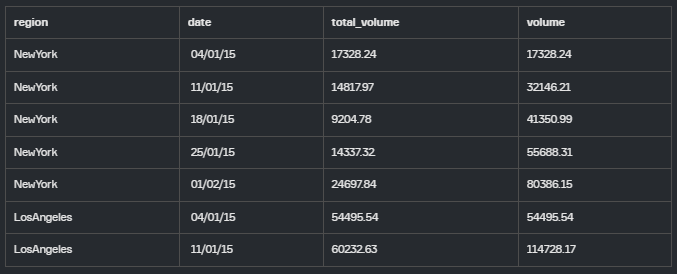

Значения внутри окна сортируйте по дате, а саму таблицу отсортируйте по убыванию региона (сначала NY, потом LA) и по возрастанию даты.

В качестве ответа укажите объем продаж в Нью Йорке на 01/03/15 (без запятых).

In [ ]:
SELECT region, 
       date, 
       total_volume, 
       SUM(total_volume) OVER w AS volume
  FROM avocado 
 WHERE region IN ('NewYork', 'LosAngeles') AND type = 'organic'
WINDOW w AS (PARTITION BY region
             ORDER BY date ASC
             ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
            )
 ORDER BY region DESC, 
          date

### 2

Теперь добавьте разбиение по каждому году (year). Таким образом, в конце февраля 2016 года объем составит уже не продажи за 2015 и январь-февраль 2016, а только январь-февраль 2016.  

Когда объемы продаж органических авокадо в Нью-Йорке превысили объемы продаж в Лос-Анджелесе?  

Для решения задачи постройте график объема продаж в двух городах, где по оси X будет лежать дата.  

- В феврале 2017  
- Никогда  
- В декабре 2016  
- __В феврале 2018__

In [ ]:
SELECT region, 
       date, 
       total_volume, 
       SUM(total_volume) OVER w AS volume
  FROM avocado 
 WHERE region IN ('NewYork', 'LosAngeles') AND type = 'organic'
WINDOW w AS (PARTITION BY region, 
                          year
             ORDER BY date ASC
             ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
            )
 ORDER BY region DESC, 
          date

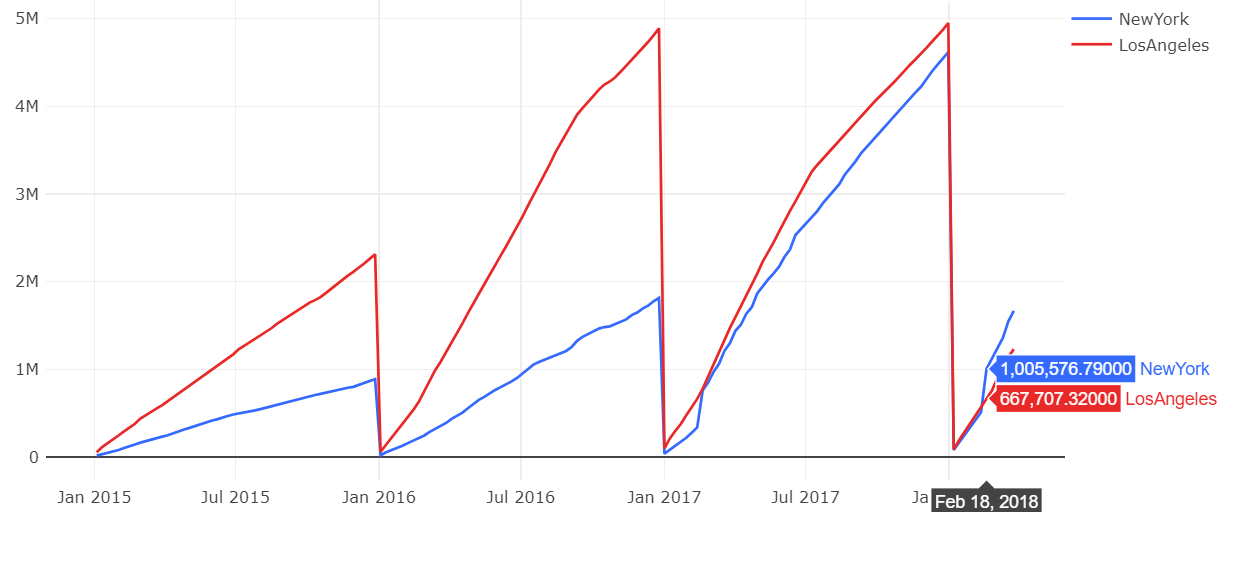

### 3

Посмотрим, когда объемы продаж обычных (conventional) авокадо резко падали по сравнению с предыдущей неделей. Возьмите данные по США в целом, посчитайте разницу между объемом продаж в неделю x (total_volume) и количеством проданных авокадо в течение предыдущей недели. Значения запишите в новый столбец week_diff.  

- type – тип авокадо (conventional)  
- region – регион (TotalUS)  
- total_volume – объем продаж за неделю

Пример:

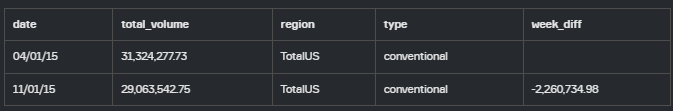

Визуализируйте результат, где по оси x будет расположена дата, а по оси y –разница между продажами в x(t) и x(t−1). Выберите верные утверждения:  

- Самые большие падения объемов продаж авокадо происходили в ноябре    
- Самое большое падение объемов продаж по сравнению с предыдущей неделей произошло 14 февраля 2016 года    
- __Самые большие падения объемов продаж авокадо происходили в феврале__    
- __Самое крупное падение объемов продаж по сравнению с предыдущей неделей произошло 12 февраля 2017 года__    
- Самое большое падение объемов продаж по сравнению с предыдущей неделей произошло 6 ноября 2016 года    

In [ ]:
SELECT date, 
       total_volume, 
       region, 
       total_volume - LAG(total_volume, 1) OVER w AS week_diff
  FROM avocado 
 WHERE region = 'TotalUS' AND type = 'conventional'
WINDOW w AS (ORDER BY date ASC
             ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
            )
 ORDER BY  date

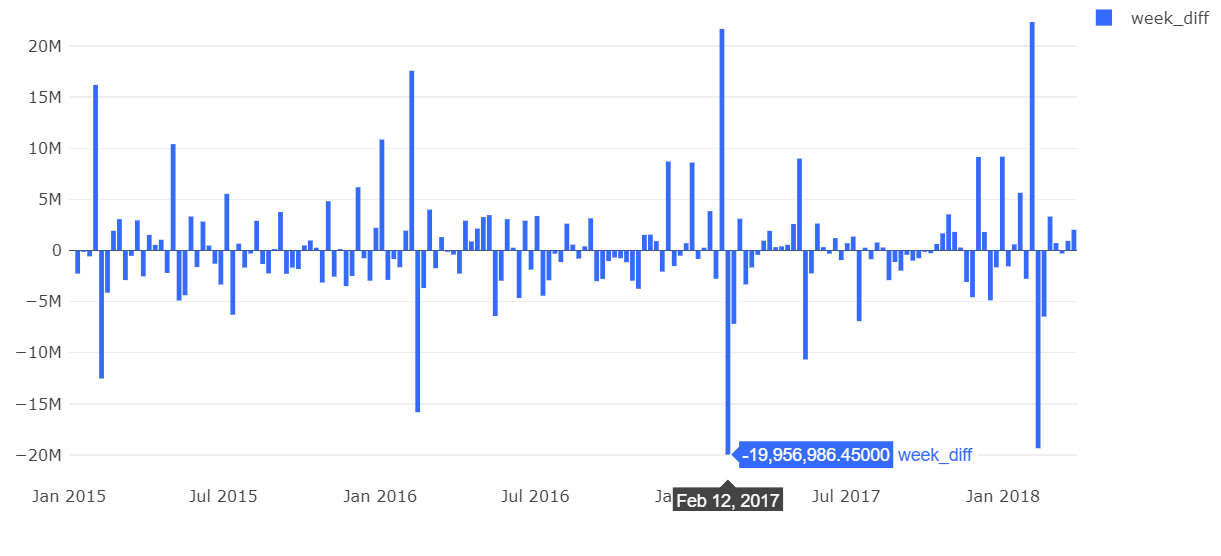

### 4

Посмотрим более подробно на объемы продаж авокадо в Нью-Йорке (NewYork) в 2018 году. Создайте колонку с разницей объемов продаж за неделю и за неделю до этого для каждого типа авокадо. Найдите день, когда продажи авокадо типа organic увеличились по сравнению с предыдущей неделей, а conventional – наоборот упали. Если таких дней несколько, то укажите их через запятую с пробелом, формат – 31/12/2020. Например: 29/03/2020, 31/12/2020

SELECT type,
       date, 
       total_volume - LAG(total_volume, 1) OVER w AS week_diff
  FROM avocado 
 WHERE region = 'NewYork' AND year = 2018
WINDOW w AS (PARTITION BY type
             ORDER BY date ASC
             ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
            )
 ORDER BY type,
          date

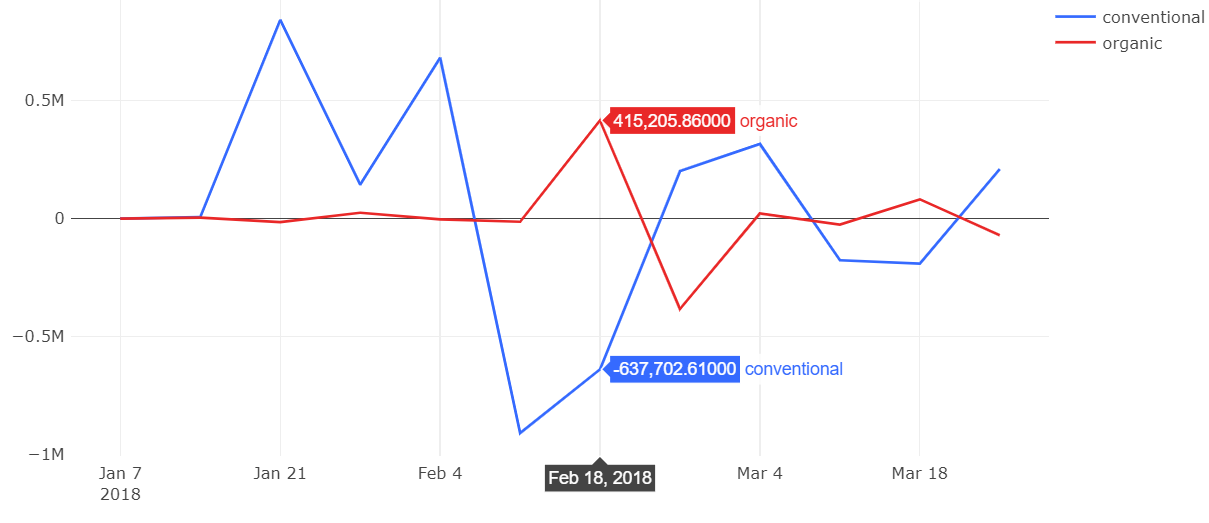

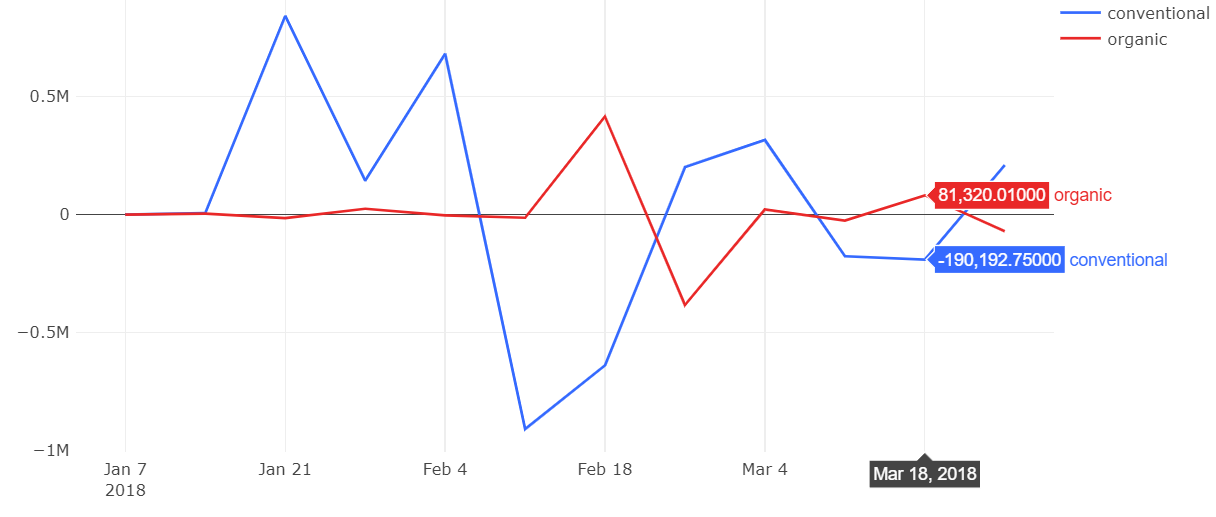

In [ ]:
18/02/2018, 18/03/2018

### 5

Теперь посчитайте скользящее среднее цены авокадо (average_price) в Нью-Йорке с разбивкой по типу авокадо. В качестве окна используйте текущую неделю и предыдущие две (обратите внимание, что в данной таблице в строках содержатся данные за неделю, а не за один день). Например 04/01/15, 11/01/15 и 18/01/15 для подсчета значения для 18/01/15.  

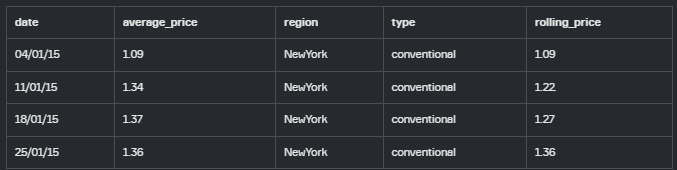 
В качестве ответа укажите полученное значение для обычных (conventional) авокадо за 17/04/16.

In [ ]:
SELECT type,
       date, 
       average_price,
       AVG(average_price) OVER w AS rolling_price
  FROM avocado 
 WHERE region = 'NewYork'
WINDOW w AS (PARTITION BY type
             ORDER BY date ASC
             ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
            )
 ORDER BY type,
          date

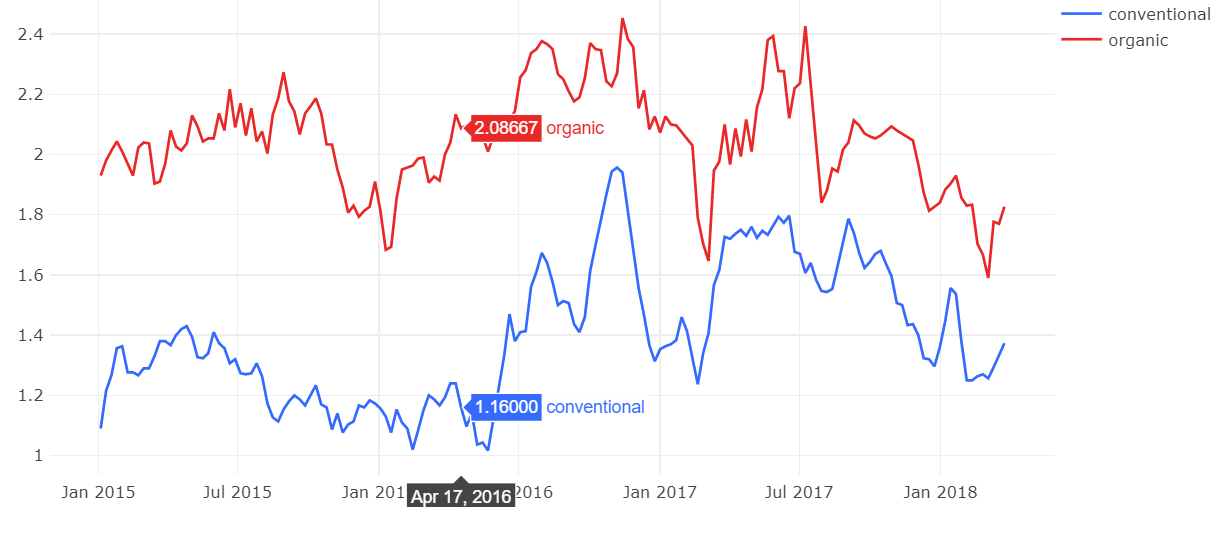